# 12 Expectations 


In [1]:
# libraries
%matplotlib inline

import os
import sys
import inspect

notebookdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
projdir = os.path.dirname(notebookdir)
srcdir = os.path.join(projdir,"src")
datadir = os.path.join(srcdir,"data")
sys.path.insert(0,notebookdir)
sys.path.insert(0,projdir)
sys.path.insert(0,srcdir)
sys.path.insert(0,datadir)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import read
from shared import directories
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)
from analysis import trivariate

import univariate, bivariate, independence, visual, description
import warnings
warnings.filterwarnings('ignore')

## 12.1 Data

In [2]:
# Get Data
sd = read.read()
df = sd['all']
df_male = sd['male']
df_female = sd['female']
# Columns of interest
exp = ['exphappy','expnum', 'match_es', 'dec','dec_o', 'yes_rate']

# Data containing independent and various dependent variables
df_exp = df[exp]
df_male_exp = df_male[exp]
df_female_exp = df_female[exp]

## 12.2 Univariate Analysis


,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
exphappy,8277.0,101,1.0,5.0,5.534131,6.0,7.0,10.0,0.109133,-8.942186,77.962698,0.0,Reject H0


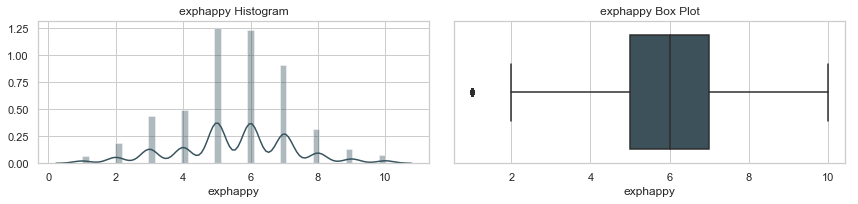

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
expnum,1800.0,6578,0.0,2.0,5.570556,4.0,8.0,20.0,0.410717,1.388555,-0.071916,0.0,Reject H0


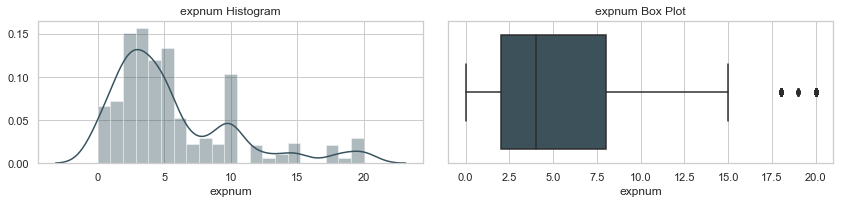

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
match_es,7205.0,1173,0.0,2.0,3.207814,3.0,4.0,18.0,0.346997,-2.074891,2.305174,0.0,Reject H0


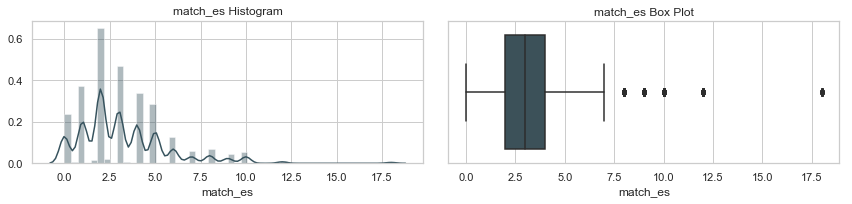

,No,Yes,missing
dec,4860,3518,0


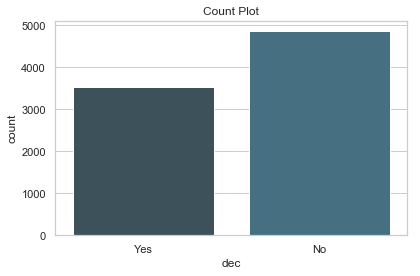

,No,Yes,missing
dec_o,4863,3515,0


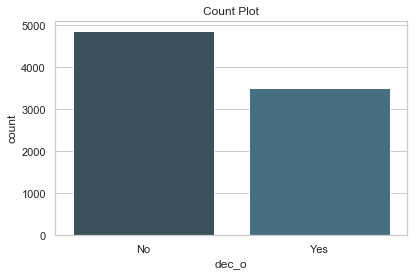

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
yes_rate,8378.0,0,0.0,0.238095,0.419551,0.4,0.6,1.0,0.0,0.0,-3.0,1.0,Fail to Reject H0


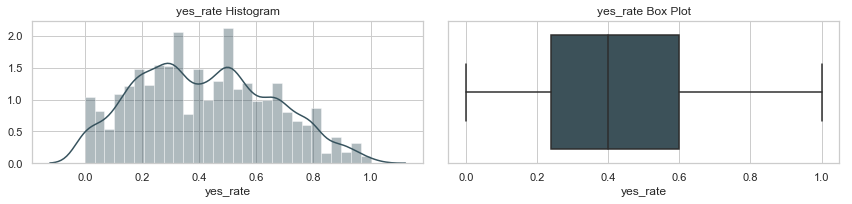

In [3]:
a = univariate.analysis(df_exp)
for a in a:
    a['desc']
    a['plot']



## 12.3 Bivariate Analysis


### 12.3.1 Subject Decision by Expectation of Happiness with the Experience
Subject yes decisions were associated with higher expectation

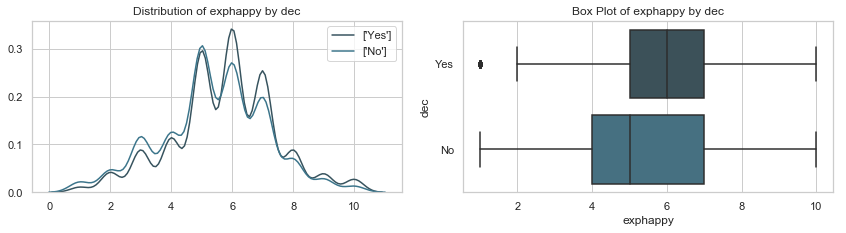

,normality,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p
exphappy,Reject H0,No,4783.0,77,1.0,4.0,5.393477,5.0,7.0,10.0,0.124870,-7.754546,58.132982,0.0
exphappy,Reject H0,Yes,3494.0,24,1.0,5.0,5.726674,6.0,7.0,10.0,0.082314,-11.982913,141.590202,0.0


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,exphappy,dec,H-Statistic,72.915376,1.353297e-17,Reject
0,Anova,exphappy,dec,F Statistic,75.214734,5.026390e-18,Reject


In [5]:
i, d, p = bivariate.analysis(x='exphappy', y='dec', df=df)
p
d
i

# 12.4 Multivariate Analysis